<a href="https://colab.research.google.com/github/pradippatel00754/MLProjects/blob/main/Cat%26DogClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:26<00:00, 46.6MB/s]
100% 1.06G/1.06G [00:26<00:00, 42.4MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten, BatchNormalization, Dropout


In [7]:
#generaters
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels ='inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels ='inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#Normalize
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation ='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 109ms/step - loss: 1.1699 - accuracy: 0.6097 - val_loss: 0.6792 - val_accuracy: 0.6376
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5336 - accuracy: 0.7323 - val_loss: 0.4849 - val_accuracy: 0.7720
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4694 - accuracy: 0.7835 - val_loss: 0.5645 - val_accuracy: 0.6816
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3926 - accuracy: 0.8215 - val_loss: 0.4890 - val_accuracy: 0.7570
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3344 - accuracy: 0.8522 - val_loss: 0.5182 - val_accuracy: 0.7936
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2622 - accuracy: 0.8903 - val_loss: 0.4572 - val_accuracy: 0.8172
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1842 - accuracy: 0.9258 - val_loss: 0.4981 - val_ac

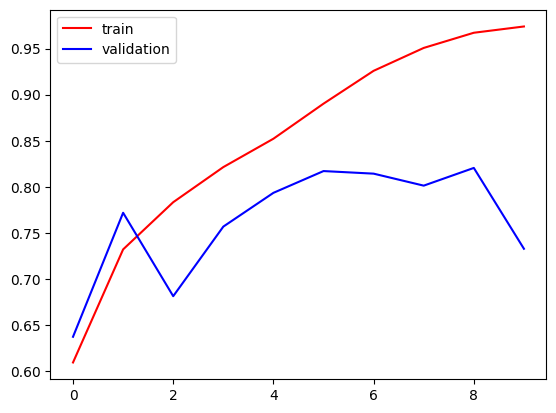

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

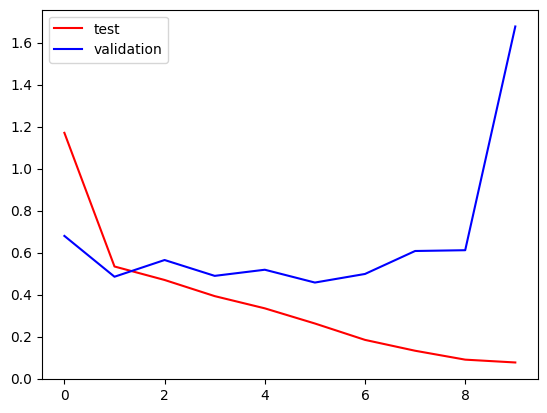

In [40]:
plt.plot(history.history['loss'],color='red',label='test')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
import cv2

In [34]:
test_img = cv2.imread('/content/cat3.jpg')

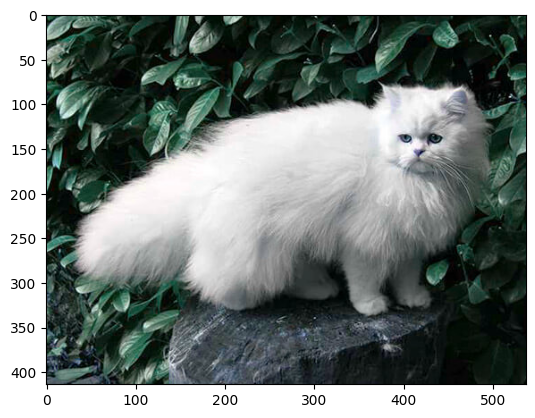

In [35]:
plt.imshow(test_img)

In [36]:
test_img.shape

(414, 537, 3)

In [37]:
test_img = cv2.resize(test_img,(256,256))

In [38]:
test_input = test_img.reshape((1,256,256,3))

In [39]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)